In [1]:
# 17/12/2024

In [28]:
import pandas as pd
from google.colab import drive
import numpy as np
import os
import glob
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Cargar una imagen en un objeto Image

In [4]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/imagenes/"

try:
    imagen  = Image.open(path + "ai_competition.png")
except IOError:
    print("error")

El tamaño de la imagen

In [5]:
imagen.size, imagen.width, imagen.height

((300, 258), 300, 258)

Para mostrar la imagen se suele usar el método show(), pero en notebooks no funciona

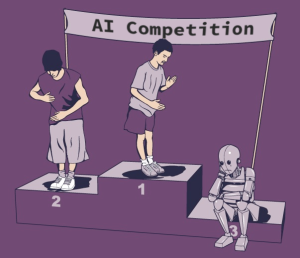

In [6]:
# imagen.show()
# from IPython.display import display
# display(imagen)
imagen


Operaciones sobre la imagen:




*   Obtener una región rectagular. El argumento box es una tupla con las coordenadas de la caja




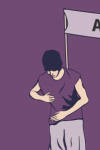

In [7]:
# coge una región de 100 * 150 píxeles que empieza en la esquina superior izquierda
trozo = imagen.crop(box = (0, 0, 100, 150))
trozo



*   Cambiar el tamaño



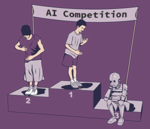

In [8]:
reducida = imagen.resize((int(imagen.width/2), int(imagen.height/2)))
reducida



*   Cambiar el tamaño aplicado solo a una región



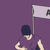

In [9]:
# coge una región de 100 * 100 píxeles que empieza en la esquina superior izquierda
# y los reduce a 50 * 50
region_reducida = imagen.resize((50, 50), box = (0, 0, 100, 100) )
region_reducida

*   Rotar la imagen

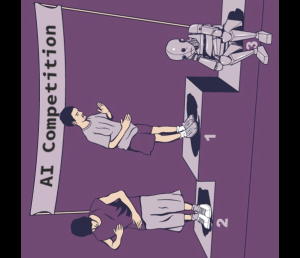

In [10]:
rotada = imagen.rotate(90)
rotada

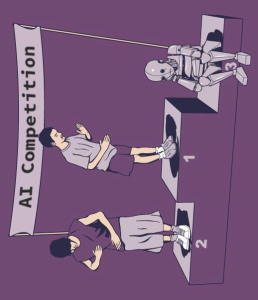

In [11]:
rotada = imagen.rotate(90, expand = True)
rotada

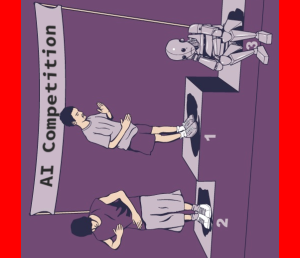

In [12]:
rotada = imagen.rotate(90, fillcolor="red")
rotada

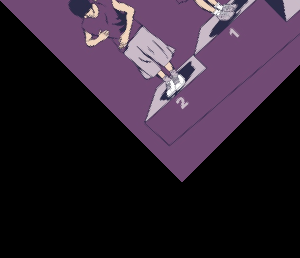

In [13]:
rotada = imagen.rotate(45, center = (0,0))
rotada

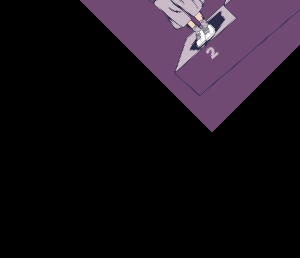

In [14]:
rotada = imagen.rotate(45, center = (0,0), translate=(30, -50))
rotada

*   Salvar la imagen


In [15]:
rotada.save(path + 'ai_competitionrotada.jpg')

* Pasar a escala de grises

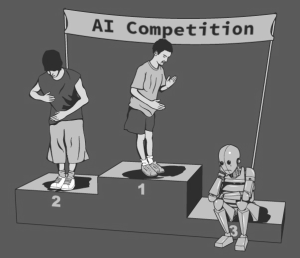

In [16]:
imagen.convert("L")



*   Acceder a los canales



In [17]:
r, g, b = imagen.split()

r solo es un canal, así que se muestra en escala de grises

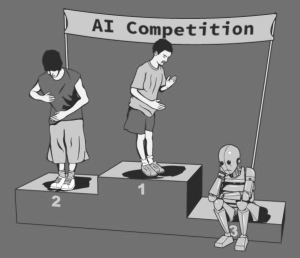

In [18]:
r

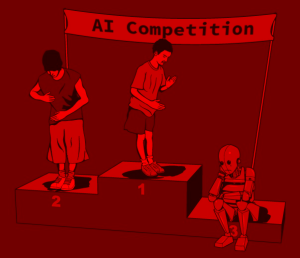

In [19]:
# crea una nueva imagen solo con el canal rojo
g = g.point(lambda i: i * 0)
b = b.point(lambda i: i * 0)
rojo = Image.merge('RGB', (r, g, b))
rojo


*  Superponer otra imagen

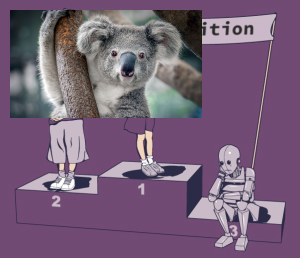

In [20]:
os.chdir(path)
koala = Image.open("koalas-1.jpg")
copia = imagen.copy()
copia.paste(koala.reduce(10), box = (10, 10))
copia



*   Añadir elementos a la imagen



In [21]:
copia = imagen.copy()
rectangulo = ImageDraw.Draw(copia)

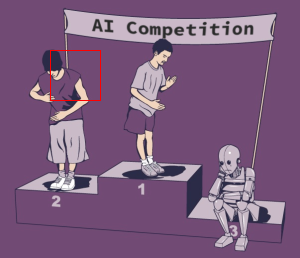

In [22]:
rectangulo.rectangle((50, 50, 100, 100), outline='red')
copia

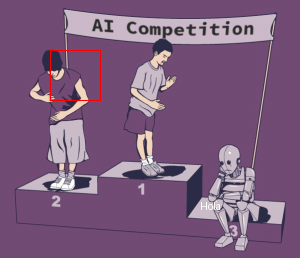

In [23]:
rectangulo.text((200,200),"Hola")
copia

* Convertir entre PIL y openCV

In [29]:
def mostrar(imagen):

    # cambiar a RGB
    if(len(imagen.shape)==3):
        imagen = imagen[...,::-1]

    plt.imshow(imagen)
    plt.show()

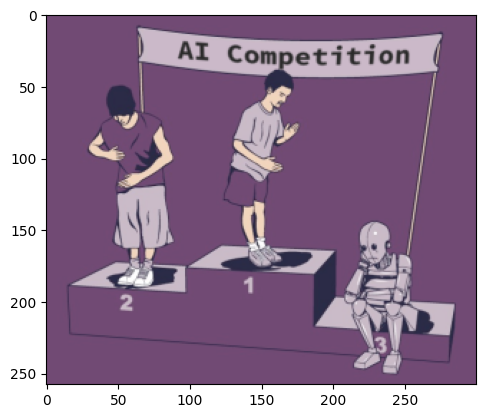

In [30]:
# de PIL a opencv
# convertir a array
arr = np.array(imagen)

# invertir canales
imgcv = cv2.cvtColor(arr,cv2.COLOR_RGB2BGR)

# mostrar
mostrar(imgcv)

In [26]:
# de opencv a PIL
imgcv = cv2.imread("koalas-1.jpg")

# invertir canales
arr = cv2.cvtColor(imgcv,cv2.COLOR_BGR2RGB)

# pasar a PIL
image = Image.fromarray(arr)
image

Output hidden; open in https://colab.research.google.com to view.